In [2]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train= tf.keras.utils.normalize(x_train, axis=1)
x_test= tf.keras.utils.normalize(x_test, axis=1)



11493376/11490434 [==============================] - 1s 0us/step


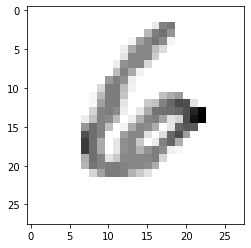

In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_train[13], cmap=plt.cm.binary)
plt.show()

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2629 - accuracy: 0.9224
Epoch 2/3
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1043 - accuracy: 0.9680
Epoch 3/3
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0715 - accuracy: 0.9771


In [5]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 20us/sample - loss: 0.0838 - accuracy: 0.9731
0.08380187594313175 0.9731


In [6]:
model.save('mnist_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mnist_model\assets


In [8]:
new_model = tf.keras.models.load_model('mnist_model')
predictions = new_model.predict(x_test)

In [12]:
import numpy as np

print(np.argmax(predictions[13]))

0


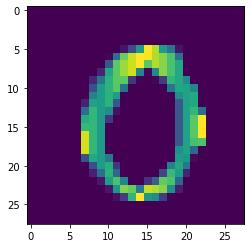

In [13]:
plt.imshow(x_test[13])
plt.show()